# ***Logistic Regression 逻辑回归***

# 思考、查阅资料，尝试回答：
----
## **1. 为什么不能直接用线性回归做分类？部分理解可参考为什么不用线性回归解决分类问题；尝试从损失函数梯度的⻆度理解；**
### a. 从分类和回归问题本质角度来说，分类问题的目标是离散的，而线性回归给出的是无界的连续结果。对于这个问题逻辑回归采用的是分解最小问题为二分类问题，从而通过计算期望得到一个(0,1)之间的值，从而判断二分类问题的解，进而达到分类的效果。虽然线性回归和逻辑回归的本质是类似的，但处理这种分类问题是线性回归做不到的。
### b. 线性回归相比逻辑回归，前者要求样本符合正态分布。
### c. 线性回归的损失函数是平方损失，相比逻辑函数的对数损失损失函数的梯度较大，当使用随机梯度下降时，如果数据点异常，对于分类问题的参数ω影响较大，影响回归精度和速度。 
https://blog.csdn.net/lc574260570/article/details/81708616/

-----

## **2. 多重共线性变量会给逻辑回归带来什么问题？为什么？怎么处理？**
### a. 问题一： 首先，逻辑回归的模型是以线性模型为基础的。而以含有多重共线性关系的数据为基础产生的线性模型，由于特征间的共线性关系，使得模型系数的解释性降低了，而且变得不可信。理想情况下，经过标准化的逻辑回归中，原本系数能够解释某变量对结果的贡献，但多重共线性使其失去了可解释性好的优点。
https://blog.csdn.net/weixin_26752765/article/details/108133291
### b. 问题二：多重共线性使得特征数多于必要，模型更容易发生过拟合。
### c. 造成多重共线性的原因有一下几种:
* 解释变量都享有共同的时间趋势；
* 一个解释变量是另一个的滞后，二者往往遵循一个趋势；
* 由于数据收集的基础不够宽，某些解释变量可能会一起变动；
* 某些解释变量间存在某种近似的线性关系。
### d. 对于多重共线性检验方法包括：
* 相关系数计算，关系数高于0.8，表明存在多重共线性；但相关系数低，并不能表示不存在多重共线性；
* 当模型的线性关系检验（F检验）显著时，几乎所有回归系数β的t检验却不显著；
* 回归系数的正负号与预期的相反；
* 容忍度（tolerance）与方差扩大因子（VIF）。某个自变量的容忍度等于1减去该自变量为因变量而其他自变量为预测变量时所得到的线性回归模型的判定系数。容忍度越小，多重共线性越严重。通常认为容忍度小于0.1时，存在严重的多重共线性。方差扩大因子等于容忍度的倒数。显然，VIF越大，多重共线性越严重。一般认为VIF大于10时，存在严重的多重共线性。
### e. 对于多重共线性，有以下处理方法：
* 可以通过正则化的方法控制模型大小，减小复杂度；
* 通过逐步回归的方式选择特征，或者直接删去某些特征；
* 可以通过相关性分析选择删去某些特征，或者对互相关性高的特征使用主成分分析等降维方法；
* 偏最小二乘法。偏最小二乘回归≈多元线性回归分析+典型相关分析+主成分分析；
* 增加样本容量。多重共线性问题的实质是样本信息的不充分而导致模型参数的不能精确估计，因此追加样本信息是解决该问题的一条有效途径。

----

## **3. L1与L2正则化会给模型带来什么影响，为什么？**
### a. L1和L2正则化通过为损失函数添加正则惩罚项来控制模型的学习能力。具体来说，正则项限制模型参数处于一个较小的范围，这样使得模型更加平滑，从而能够减小过拟合的问题。
https://blog.csdn.net/weixin_42377695/article/details/113027323
### b. 特别地，L1正则化后得到的模型参数更稀疏，可用于特征选择。L2正则化后得到的模型参数值较小，数据的偏移对结果不会起到很大的影响，那么模型也就能够适应不同的数据集，也就是说此模型的泛化能力强。

----

## **4. 逻辑回归本身只具备线性的表达能力，如何让模型学会非线性关系？**
### 逻辑回归的模型引入了sigmoid函数映射，是非线性模型，但本质上又是一个线性回归模型，因为除去sigmoid映射函数关系，其他的步骤，算法都是线性回归的。可以说，逻辑回归，都是以线性回归为理论支持的。这里讲到的线性，是说模型关于模型系数一定是线性形式的。因此，可以通过对重新构建特征来解决非线性关系的分类问题，比如对特征x进行变化，包括乘方、开方、取指数对数等等，产生新的特征。

----
## **5. 逻辑回归模型中特征是否需要归一化？**
### 从前向过程来看：
### 逻辑回归模型的输出是经过softmax的概率值，概率值的排序不受归一化的影响。从另一个角度来看，softmax其实也就实现了归一化的目的。

### 从反向过程来看：
### 逻辑回归模型的参数优化一般采用了梯度下降法，如果不对特征进行归一化，可能会使得损失函数值得等高线呈椭球形，这样花费更多的迭代步数才能到达最优解。

### 从损失函数来看：
### 逻辑回归模型的损失函数可以加入正则项，那么参数的大小便决定了损失函数值，特征就有必要先进行归一化。

### 所以综上所述，在逻辑回归模型中，归一化还是有必要的，尤其是在正则化和梯度下降中所起到的作用。

## 参考别人选择特征的思路

特征选择

第一反应就是名字，Ticket，Cabin这些字段太零散，基本上每个人的都不一样，感觉并没有什么用。Cabin这一维度的特征更是缺失很严重，所以暂且不考虑Ticket，Cabin的这些特征 。
反观Name这个特征，看似并没有什么用，大家的名字都不一样，实际上从GBDT的调试过程来看，这个特征的使用频率很高的。通俗地说，Name可以给模型提供一定的泛化能力，比如一家人面临危机的时候，大家肯定都先找到自己的家人一起逃生，所以一家人的存活状况相关性肯定很高的。所以我引入名字特征的方式并不是直接引入名字，而是考虑和当前预测人的名字同姓的存活率。另外还有个背景问题，就是逃生的时候，女士优先逃生，这个时候家人就分开了，所以名字这个特征还要考虑性别，综合来说就是性别＋姓的存活率作为一个特征。
另外，还增了相应类别的存活率这些特征，比如各种性别的存活率以及各种等级的存活率，之前请教过别人，**这种把分类ID扔进模型之后有必要把所属ID的百分比扔进去吗？还是有必要的，前者是“是什么类别“的因素，后者是“有多少存活比例“的因素，是和有不能混为一谈。**
————————————————
版权声明：本文为CSDN博主「煎饼果子来一套」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/yobobobo/article/details/48194021


# ***Titanic***
## test survival on the Titanic




----
## 1.数据导入观察
### 观察了各特征和生存率的关系。处理了Ticket特征，提取出数字，对训练和测试集都是一样操作。


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [470]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [471]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [472]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [473]:
test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [474]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [475]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

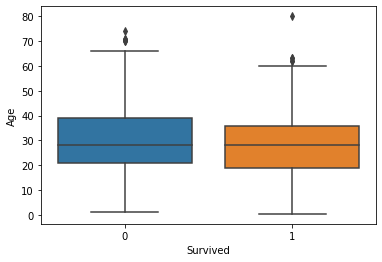

In [476]:
sns.boxplot(y=train.Age, x=train.Survived)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

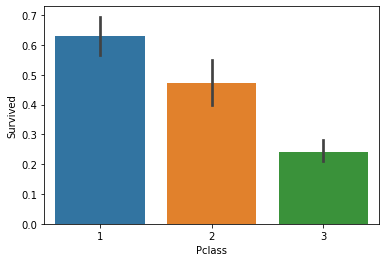

In [477]:
sns.barplot(y=train.Survived,x=train.Pclass)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

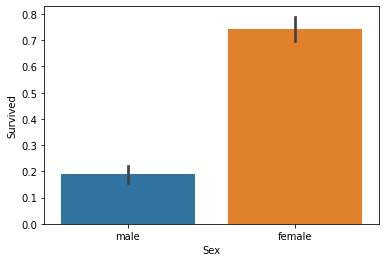

In [478]:
sns.barplot(x=train.Sex, y=train.Survived)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

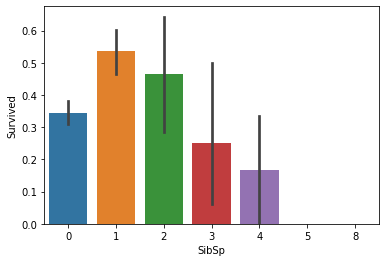

In [479]:
sns.barplot(x=train.SibSp, y=train.Survived)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

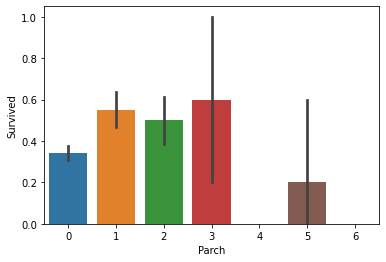

In [480]:
sns.barplot(x=train.Parch, y=train.Survived)

In [481]:
train.Ticket[179]='0'

D:\programs\envs\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [482]:

ticket=train.Ticket.copy()
for i in range(len(ticket)):
    end=0
    for j in range(len(ticket[i])):
        if (ticket[i][-j])==' ':
            end=-(j-1)
            break
    train.Ticket[i]=int(ticket[i][end:])

D:\programs\envs\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [483]:
ticket2=test.Ticket.copy()
for i in range(len(ticket2)):
    end=0
    for j in range(len(ticket2[i])):
        if (ticket2[i][-j])==' ':
            end=-(j-1)
            break
    test.Ticket[i]=int(ticket2[i][end:])

D:\programs\envs\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Survived', ylabel='Ticket'>

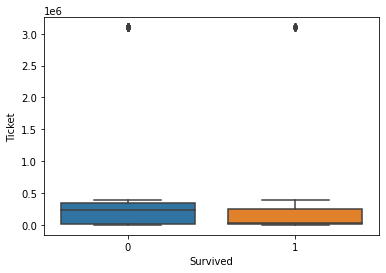

In [484]:
sns.boxplot(y=train.Ticket, x=train.Survived)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

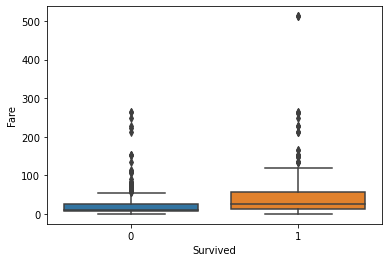

In [485]:
sns.boxplot(y=train.Fare, x=train.Survived)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

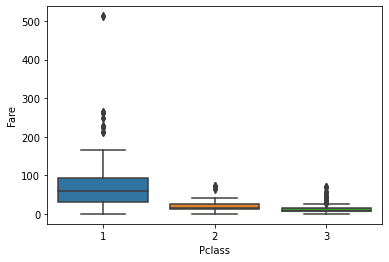

In [486]:
sns.boxplot(y=train.Fare,x=train.Pclass)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

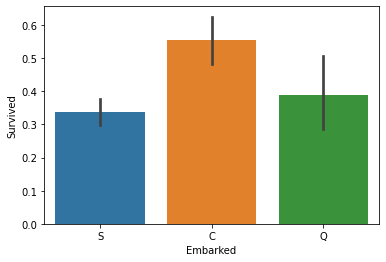

In [487]:
sns.barplot(x=train.Embarked, y=train.Survived)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

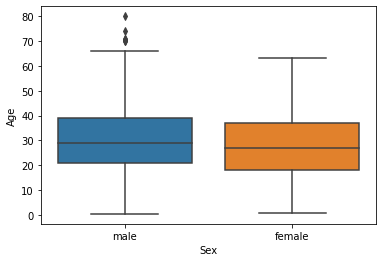

In [488]:
sns.boxplot(x=train.Sex, y=train.Age)

In [489]:

train.Ticket=train.Ticket.astype('int64')
test.Ticket=test.Ticket.astype('int64')

In [490]:
train1=train.set_index('Survived')
train1.loc[1].describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,342.000000,342.000000,342,342,290.000000,342.000000,342.000000,3.420000e+02,342.000000,136,340
unique,NaN,NaN,342,2,NaN,NaN,NaN,NaN,NaN,101,3
top,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,NaN,NaN,NaN,NaN,NaN,B96 B98,S
freq,NaN,NaN,1,233,NaN,NaN,NaN,NaN,NaN,4,217
mean,444.368421,1.950292,NaN,NaN,28.343690,0.473684,0.464912,2.175186e+05,48.395408,NaN,NaN
std,252.358840,0.863321,NaN,NaN,14.950952,0.708688,0.771712,5.660114e+05,66.596998,NaN,NaN
min,2.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN
25%,250.750000,1.000000,NaN,NaN,19.000000,0.000000,0.000000,1.431125e+04,12.475000,NaN,NaN
50%,439.500000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,3.102650e+04,26.000000,NaN,NaN
75%,651.500000,3.000000,NaN,NaN,36.000000,1.000000,1.000000,2.438718e+05,57.000000,NaN,NaN


In [491]:
train1.loc[0].describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,549.000000,549.000000,549,549,424.000000,549.000000,549.000000,5.490000e+02,549.000000,68,549
unique,NaN,NaN,549,2,NaN,NaN,NaN,NaN,NaN,62,3
top,NaN,NaN,"Goldsmith, Mr. Frank John",male,NaN,NaN,NaN,NaN,NaN,C124,S
freq,NaN,NaN,1,468,NaN,NaN,NaN,NaN,NaN,2,427
mean,447.016393,2.531876,NaN,NaN,30.626179,0.553734,0.329690,3.464953e+05,22.117887,NaN,NaN
std,260.640469,0.735805,NaN,NaN,14.172110,1.288399,0.823166,7.029134e+05,31.388207,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN
25%,211.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,1.487900e+04,7.854200,NaN,NaN
50%,455.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,2.346860e+05,10.500000,NaN,NaN
75%,675.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,3.492210e+05,26.000000,NaN,NaN


----
## 2. 补全缺失值

### 前面已知主要是Age和Cabin有缺失。同时Fare和Embarked有个位数缺失，可以手动填补。观察cabin缺失严重，不使用。对Age观察分布，准备填补。

(0.0, 90.0)

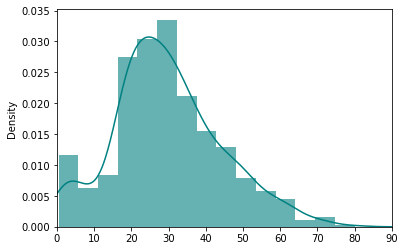

In [492]:
train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
plt.xlim(0,90)

In [493]:
train.set_index('Sex').loc['male'].Age.describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

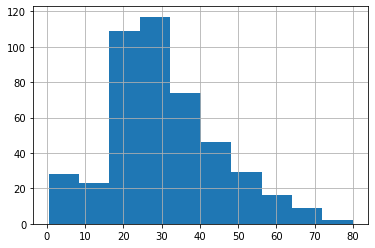

In [494]:
%matplotlib inline
train.set_index('Sex').loc['male'].Age.hist()
train.set_index('Sex').loc['male'].Age.describe()


count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64

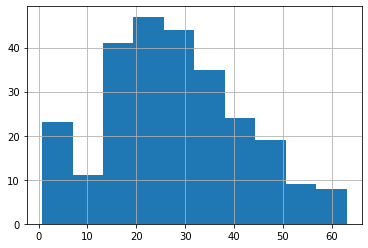

In [495]:
%matplotlib inline
train.set_index('Sex').loc['female'].Age.hist()
train.set_index('Sex').loc['female'].Age.describe()


### 观察发现男性和女性的年龄分布有所区别，因此决定根据性别和对应的中位数填补缺失值

In [496]:
for i in range(len(train.Age)):
    if np.isnan(train.Age[i]):
        if train.Sex[i]=='male':
            train.Age[i]=29
        else:
            train.Age[i]=27
for i in range(len(test.Age)):
    if np.isnan(test.Age[i]):
        if test.Sex[i]=='male':
            test.Age[i]=29
        else:
            test.Age[i]=27

D:\programs\envs\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\programs\envs\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\programs\envs\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:

In [497]:
train.drop(['Cabin','Name'],axis=1,inplace=True)
test.drop(['Cabin','Name'],axis=1,inplace=True)


In [500]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035734,-0.057527,-0.001652,-0.022100,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.073296,-0.035322,0.081629,-0.095605,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.338056,0.083081,0.018443,0.284016,-0.549500
Age,0.035734,-0.073296,-0.338056,1.000000,-0.236376,-0.176038,-0.100464,0.094161
SibSp,-0.057527,-0.035322,0.083081,-0.236376,1.000000,0.414838,0.046942,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176038,0.414838,1.000000,-0.032530,0.216225
Ticket,-0.022100,-0.095605,0.284016,-0.100464,0.046942,-0.032530,1.000000,-0.155371
Fare,0.012658,0.257307,-0.549500,0.094161,0.159651,0.216225,-0.155371,1.000000


----
## 3.逻辑回归
### 观察并选择特征，做好处理进行逻辑回归

In [2]:
train=pd.read_csv('train_processed.csv')
test=pd.read_csv('test_precessed.csv')

In [3]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [4]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 考虑到两个亲友关系特征的共线性关系，进行降维处理。根据前面的观察和计算，舱室等级和票价有一定相关性，但是不知道怎么处理比较好。先将所有分类变量处理为独热码。

In [5]:
pca=PCA(n_components=1)
ncol=pca.fit_transform(train[['SibSp','Parch']])
train["Companion"]=ncol
pca=PCA(n_components=1)
ncol=pca.fit_transform(test[['SibSp','Parch']])
test["Companion"]=ncol

In [6]:
df_train = pd.get_dummies(train, columns=["Pclass","Embarked","Sex"])
df_train.drop('Sex_female', axis=1, inplace=True)
df_train.drop('PassengerId', axis=1, inplace=True)
df_train.drop('Ticket', axis=1, inplace=True)
df_train.drop('SibSp', axis=1, inplace=True)
df_train.drop('Parch', axis=1, inplace=True)

In [7]:

df_test = pd.get_dummies(test, columns=["Pclass","Embarked","Sex"])
df_test.drop('Sex_female', axis=1, inplace=True)
df_test.drop('PassengerId', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)
df_test.drop('SibSp', axis=1, inplace=True)
df_test.drop('Parch', axis=1, inplace=True)


In [8]:
df_train

,Survived,Age,Fare,Companion,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0.259128,0,0,1,0,0,1,1
1,1,38.0,71.2833,0.259128,1,0,0,1,0,0,0
2,1,26.0,7.9250,-0.637826,0,0,1,0,0,1,0
3,1,35.0,53.1000,0.259128,1,0,0,0,0,1,0
4,0,35.0,8.0500,-0.637826,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,-0.637826,0,1,0,0,0,1,1
887,1,19.0,30.0000,-0.637826,1,0,0,0,0,1,0
888,0,27.0,23.4500,1.143377,0,0,1,0,0,1,0
889,1,26.0,30.0000,-0.637826,1,0,0,1,0,0,1


In [9]:
df_test

,Age,Fare,Companion,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,-0.582143,0,0,1,0,1,0,1
1,47.0,7.0000,0.016856,0,0,1,0,0,1,0
2,62.0,9.6875,-0.582143,0,1,0,0,1,0,1
3,27.0,8.6625,-0.582143,0,0,1,0,0,1,1
4,22.0,12.2875,0.817606,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
413,29.0,8.0500,-0.582143,0,0,1,0,0,1,1
414,39.0,108.9000,-0.582143,1,0,0,1,0,0,0
415,38.5,7.2500,-0.582143,0,0,1,0,0,1,1
416,29.0,8.0500,-0.582143,0,0,1,0,0,1,1


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X = df_train.drop('Survived', axis=1, inplace=False)
y = df_train['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 9)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'Companion', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male']


D:\programs\envs\python36\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
D:\programs\envs\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\programs\envs\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incr

D:\programs\envs\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\programs\envs\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Optimal number of features: 10
Selected features: ['Age', 'Fare', 'Companion', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male']


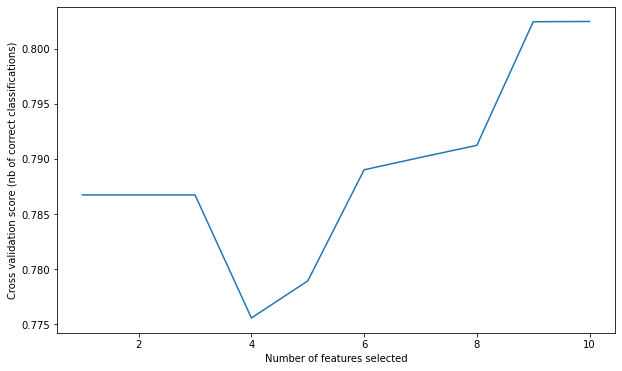

In [11]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

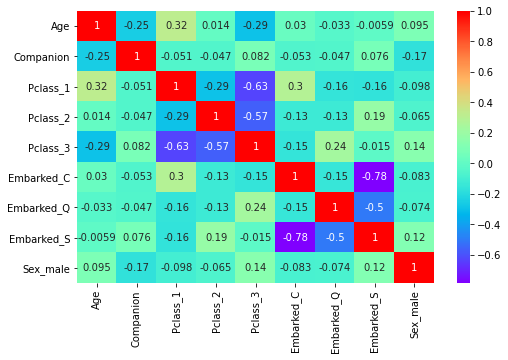

In [12]:
picked_features = ['Age', 'Companion', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male']
X = df_train[picked_features]
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="rainbow")
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
result=model.predict(df_test[picked_features])

D:\programs\envs\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
temp=pd.read_csv('test.csv')
submission={'PassengerId':temp.PassengerId,'Survived':result}
df_submission=pd.DataFrame(submission)
df_submission.to_csv('submission_1.csv')

In [15]:
model = LogisticRegression(penalty='l1',solver='liblinear')
model.fit(X, y)
result=model.predict(df_test[picked_features])
temp=pd.read_csv('test.csv')
submission={'PassengerId':temp.PassengerId,'Survived':result}
df_submission=pd.DataFrame(submission)
df_submission.to_csv('submission_2.csv')

In [15]:
model = LogisticRegression(penalty='l2',solver='lbfgs')
model.fit(X, y)
result=model.predict(df_test[picked_features])
temp=pd.read_csv('test.csv')
submission={'PassengerId':temp.PassengerId,'Survived':result}
df_submission=pd.DataFrame(submission)
df_submission.to_csv('submission_3.csv')